In [34]:
# %matplotlib nbagg
# %matplotlib osx
# %matplotlib qt

import os
import shutil
import winsound

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from tkinter.filedialog import askdirectory
import cv2
from osgeo import gdal, osr
from PIL import Image
import piexif

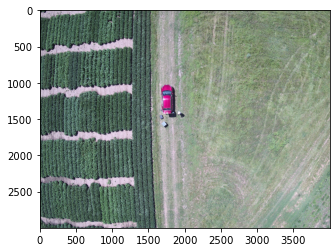

In [11]:
image_folder = r'D:\UAV data\2019\BRC\20190814_141033\1-RGB'

image_list = os.listdir(image_folder)
img = io.imread(os.path.join(image_folder, image_list[70]))

plt.figure()
plt.imshow(img)

In [16]:
ds = gdal.Open(os.path.join(image_folder, image_list[70]))
gt = ds.GetGeoTransform()
width = ds.RasterXSize
height = ds.RasterYSize
print(gt)
minx = gt[0]
miny = gt[3] + width*gt[4] + height*gt[5] 
maxx = gt[0] + width*gt[1] + height*gt[2]
maxy = gt[3]

print(minx, miny, maxx, maxy)

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
0.0 3000.0 4000.0 0.0


In [78]:
import os
import shutil
import winsound

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
from tkinter.filedialog import askdirectory
import cv2
from osgeo import gdal, osr
from PIL import Image
import piexif


image_folder = r'D:\UAV data\2019\BRC\20190814_141033\1-RGB'

image_list = os.listdir(image_folder)

image = Image.open(os.path.join(image_folder, image_list[70]))
exif_byte = image.info['exif']
exif = image._getexif()
exif_test = piexif.dump(exif)

In [79]:
print(exif)

{36864: b'0210', 37121: b'\x01\x02\x03\x00', 40960: b'0100', 40961: 1, 40962: 4000, 40963: 3000, 37386: 8.0, 41486: 10.88, 271: 'FLIR', 272: 'Duo Pro R\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 41487: 8.704, 41488: 4, 531: 1, 37396: (2000, 1500, 4000, 3000), 282: 72.0, 283: 72.0, 33437: 1.8, 34853: {0: b'\x03\x02\x00\x00', 1: 'N', 2: (38.0, 53.0, 29.69696), 3: 'W', 4: (92.0, 12.0, 50.5535904), 5: b'\x00', 6: 313.61, 7: (14.0, 11.0, 45.0), 12: 'K', 13: 0.683, 14: 'T', 15: 351.32}, 296: 2, 305: 'V01.02.05\x00\x00\x00\x00\x00\x00', 700: b'<?xpacket begin="" id="W5M0MpCehiHzreSzNTczkc9d"?>\r\n<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"\r\nxmlns:Camera="http://pix4d.com/camera/1.0/"\r\nxmlns:FLIR="http://ns.flir.com/xmp/1.0/">\r\n<rdf:Description rdf:about="">\r\n<Camera:BandName>\r\n<rdf:Seq>\r\n<rdf:li>LWIR</rdf:li>\r\n</rdf:Seq>\r\n</Camera:BandName>\r\n<Camera:Yaw>-1921/100</Camera:Yaw>\r\n<Camera:Pitch>-8670/100</Came

In [80]:
b = b'\xd0\x07\xdc\x05\xa0\x0f\xb8\x0b'
print(exif_byte.decode('latin1')) 

Exif  II*         Æ        Ì       ¶       ¾   (       1    ì              ü   i      %    Z  
      ¢      ¢      ¢       P  H      H      FLIR  Duo Pro R                       V01.02.05         è  @  è  *  è   "  è   ¼ Ï         0210                 0100                     ¸      ÐÜ ¸<?xpacket begin="" id="W5M0MpCehiHzreSzNTczkc9d"?>
<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
xmlns:Camera="http://pix4d.com/camera/1.0/"
xmlns:FLIR="http://ns.flir.com/xmp/1.0/">
<rdf:Description rdf:about="">
<Camera:BandName>
<rdf:Seq>
<rdf:li>LWIR</rdf:li>
</rdf:Seq>
</Camera:BandName>
<Camera:Yaw>-1921/100</Camera:Yaw>
<Camera:Pitch>-8670/100</Camera:Pitch>
<Camera:Roll>-6761/100</Camera:Roll>
<Camera:GPSXYAccuracy>1.05</Camera:GPSXYAccuracy>
<Camera:GPSZAccuracy>1.44</Camera:GPSZAccuracy>
<Camera:GyroRate>5.03</Camera:GyroRate>
<Camera:DetectorBitDepth>16</Camera:De

In [81]:
image_folder2 = r'D:\UAV data\2019\BRC\20190814_141033\2-IR'

image_list2 = os.listdir(image_folder2)

image2 = Image.open(os.path.join(image_folder2, image_list2[70]))
exif_byte2 = image2.info['exif']
exif2 = image2._getexif()
exif_test2 = piexif.dump(exif2)

KeyError: 'exif'

In [84]:
import exifread

with open(os.path.join(image_folder2, image_list2[70]), 'rb') as f:
    tags = exifread.process_file(f)

{'Image ImageWidth': (0x0100) Short=640 @ 657806,
 'Image ImageLength': (0x0101) Short=512 @ 657818,
 'Image BitsPerSample': (0x0102) Short=16 @ 657830,
 'Image Compression': (0x0103) Short=Uncompressed @ 657842,
 'Image PhotometricInterpretation': (0x0106) Short=1 @ 657854,
 'Image Make': (0x010F) ASCII=FLIR @ 658082,
 'Image Model': (0x0110) ASCII=Duo Pro R @ 658088,
 'Image StripOffsets': (0x0111) Long=8 @ 657890,
 'Image SamplesPerPixel': (0x0115) Short=1 @ 657902,
 'Image RowsPerStrip': (0x0116) Short=512 @ 657914,
 'Image StripByteCounts': (0x0117) Long=655360 @ 657926,
 'Image XResolution': (0x011A) Ratio=1 @ 658066,
 'Image YResolution': (0x011B) Ratio=1 @ 658074,
 'Image PlanarConfiguration': (0x011C) Short=1 @ 657962,
 'Image ResolutionUnit': (0x0128) Short=Not Absolute @ 657974,
 'Image PageNumber': (0x0129) Short=[0, 1] @ 657986,
 'Image Software': (0x0131) ASCII=V01.02.05 @ 658098,
 'Image SampleFormat': (0x0153) Short=Unsigned @ 658010,
 'Image ApplicationNotes': (0x02BC)

In [86]:
import tifffile
with tifffile.TiffFile(os.path.join(image_folder2, image_list2[70]), 'rb') as tif:
    tif_tags = {}
    for tag in tif.pages[0].tags.values():
        name, value = tag.name, tag.value
        tif_tags[name] = value
    image = tif.pages[0].asarray()
    
    
print(tif_tags)



{'ImageWidth': 640, 'ImageLength': 512, 'BitsPerSample': 16, 'Compression': <COMPRESSION.NONE: 1>, 'PhotometricInterpretation': <PHOTOMETRIC.MINISBLACK: 1>, 'Make': 'FLIR', 'Model': 'Duo Pro R', 'StripOffsets': (8,), 'SamplesPerPixel': 1, 'RowsPerStrip': 512, 'StripByteCounts': (655360,), 'XResolution': (1, 1), 'YResolution': (1, 1), 'PlanarConfiguration': <PLANARCONFIG.CONTIG: 1>, 'ResolutionUnit': <RESUNIT.NONE: 1>, 'PageNumber': (0, 1), 'Software': 'V01.02.05', 'SampleFormat': <SAMPLEFORMAT.UINT: 1>, 'XMP': b'<?xpacket begin="" id="W5M0MpCehiHzreSzNTczkc9d"?>\r\n<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"\r\nxmlns:Camera="http://pix4d.com/camera/1.0/"\r\nxmlns:FLIR="http://ns.flir.com/xmp/1.0/">\r\n<rdf:Description rdf:about="">\r\n<Camera:BandName>\r\n<rdf:Seq>\r\n<rdf:li>LWIR</rdf:li>\r\n</rdf:Seq>\r\n</Camera:BandName>\r\n<Camera:CentralWavelength>\r\n<rdf:Seq>\r\n<rdf:li>10000</rdf:li>\r\n</rdf:Seq>\r\n</Camera:CentralWavelength>\r\n<Camera:WavelengthFWHM>\r